---    
Привет, Вячесляв!

Спасибо, за такие подробные и понятные пояснения! Отмечать исправление буду этими синими прямоугольничками.

<div class="alert alert-block alert-info">
    
### Правка

Привет, Дарья!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
# Итоговый комментарий ревьюера ver.2
    
#### Успех
    
Спасибо тебе за исправления замечаний. Вот теперь я точно смогу принять проект, ведь ты отлично постаралась. От себя желаю успехов в дальнейшей учебе. Ты точно справишься. 
</div 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Используемые переменные:**

*df* - первоначальные данные (предоставленная таблица);

*df_prepr* - данные после предобработки (с заполненными пропусками);

*df_add* - данные с новыми столбцами;

*df_10* - данные по 10 населенным пунктам, в которых продавалось больше всего недвижимости;

*df_spb* - данные по Санкт-Петербургу.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе большое за оглавление к проекту. 
</div 

**1.1. Импортируем необходимые библиотеки.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.float_format", "{:.2f}".format) #чтобы не было экспоненциальных чисел в столбце цен

**1.2. Открываем и сохраняем первоначальные данные в переменной df.**

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' , decimal='.')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Избавились от разделителья и сохранили проект в переменную. 
</div 

**1.3. Изучаем общую информацию о полученном датафрейме.**



*Описание данных:*

*airports_nearest — расстояние до ближайшего аэропорта в метрах (м)*

*balcony — число балконов*

*ceiling_height — высота потолков (м)*

*cityCenters_nearest — расстояние до центра города (м)*

*days_exposition — сколько дней было размещено объявление (от публикации до снятия)*

*first_day_exposition — дата публикации*

*floor — этаж*

*floors_total — всего этажей в доме*

*is_apartment — апартаменты (булев тип)*

*kitchen_area — площадь кухни в квадратных метрах (м²)*

*last_price — цена на момент снятия с публикации*

*living_area — жилая площадь в квадратных метрах (м²)*

*locality_name — название населённого пункта*

*open_plan — свободная планировка (булев тип)*

*parks_around3000 — число парков в радиусе 3 км*

*parks_nearest — расстояние до ближайшего парка (м)*

*ponds_around3000 — число водоёмов в радиусе 3 км*

*ponds_nearest — расстояние до ближайшего водоёма (м)*

*rooms — число комнат*

*studio — квартира-студия (булев тип)*

*total_area — общая площадь квартиры в квадратных метрах (м²)*

*total_images — число фотографий квартиры в объявлении*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информация о проекте получена 
</div 

**1.4. Построим общую гистограмму для всех столбцов таблицы.**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

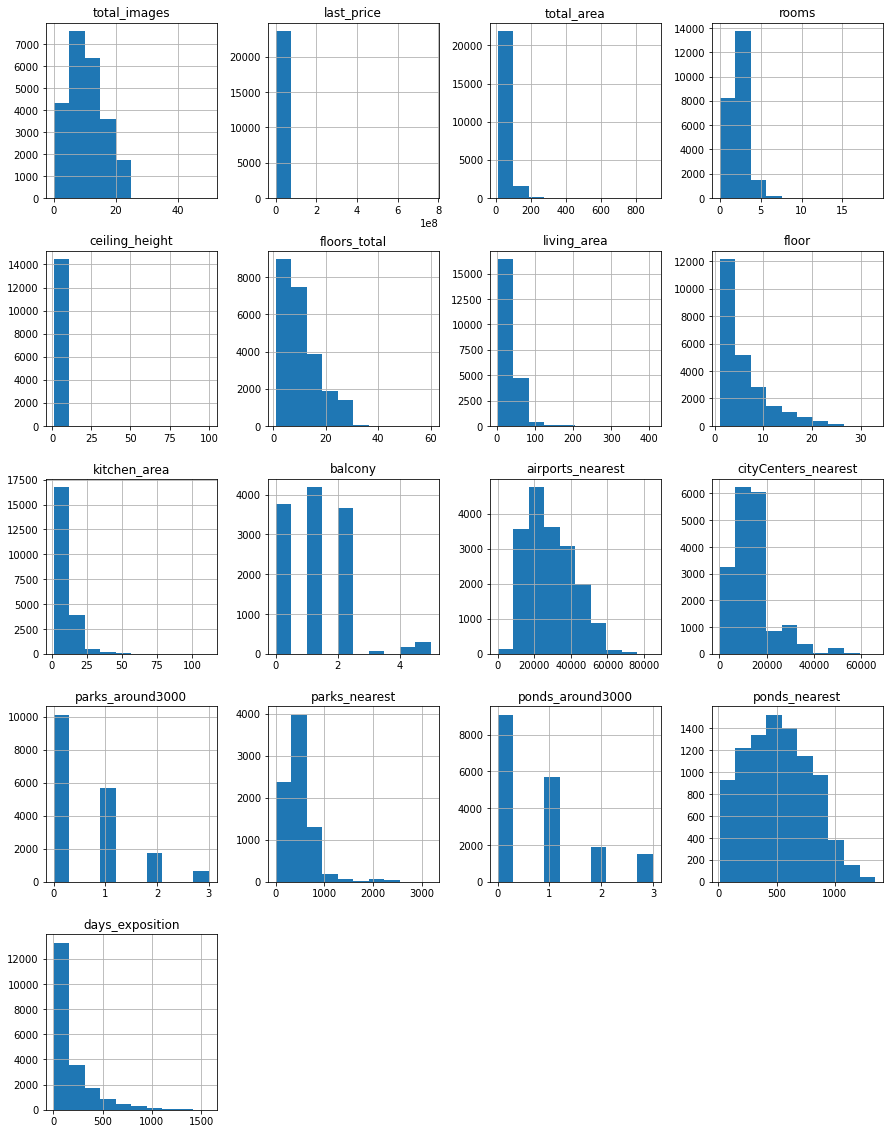

In [4]:
df.hist(figsize=(15, 20))

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут не хватает промежуточного вывода по ходу Знакоства с данными. В нем обычно пишут все то, что обнаружили при знакомстве с датасетом. 
</div 

### Предобработка данных

**Находим и изучем пропущенные значения в столбцах. Заполняем пропущенные значения там, где это возможно.**

**2.1. Определяем, в каких столбцах есть пропущенные значения.**

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Есть хорошая библиотека для изучения пропусков https://russianblogs.com/article/5001266235/
</div 

In [6]:
#df[df['cityCenters_nearest'].isna()].head(30) #эта строка использовалась для анализа данных пропущенных значений каждого столбца

#df[df['airports_nearest'].isna()]['locality_name'].unique() #эта строка использовалась для анализа данных пропущенных значений каждого столбца

<p style="text-align: center; font-weight:bold">Пропущенные значения присутствуют в колонках:</p>

**ceiling_height** (+) — высота потолков (м) (Так этот тип данных относится к типу, который заполняют люди вручную, то, скорее всего, они просто не заполнили эту ячейку. Возможно, они сами ее не знают, или высота потолков не имеет значимой роли, или дом может оказаться необычной планировки с разными потолками, или некоторые такие объявления создавались еще до того, как появилась возможность добавлять высоту потолков. Пропущенных значений в этом столбце довольно много. *Лучше всего заполнить пропущенные значения медианным*);

**balcony** (+) — число балконов (Скорее всего, значения пропущены, потому что балкона/балконов в доме нет. *Лучше всего заполнить пропущенные значения 0*);

floors_total — всего этажей в доме (Так этот тип данных относится к типу, который заполняют люди вручную, то, скорее всего, они просто не заполнили эту ячейку. Возможно, некоторые такие объявления создавались еще до того, как появилась возможность добавлять количество этажей в доме или это частные одноэтажные дома. *Пропущенных значений в этом столбце очень мало, поэтому можно и не заполнять пропущенные значения, чтобы не искажать данные*);

**living_area** (+) — жилая площадь в квадратных метрах (м²) (Так этот тип данных относится к типу, который заполняют люди вручную, то, скорее всего, они просто не заполнили эту ячейку. *Лучше всего заполнить пропущенные значения медианным*);

**is_apartment** (+) — апартаменты (булев тип) (Так этот тип данных относится к типу, который заполняют люди вручную, то, скорее всего, они просто не заполнили эту ячейку. Скорее всего, пропущенные значения обозначают, что данное помещение не имеет юр статуса апартаментов. *Лучше всего заполнять пропущенные значения False*);

**kitchen_area** (+) — площадь кухни в квадратных метрах (м²) (Так этот тип данных относится к типу, который заполняют люди вручную, то, скорее всего, они просто не заполнили эту ячейку. Возможно, владельцы студий не смогли определить размер своей кухни. Однако, пропущенные значения встречаются и в обычных квартирах. *Лучше всего заполнить пропущенные значения медианным*);

*locality_name* (+) — название населённого пункта (Очень подозрительный пропуск. Обычно объявления о продаже недвимости без адреса являются мошенническими или же предложениями риелторов, которые так привлекают покупателей, чтобы сообщить, что конкретно эта квартира уже продана, но поблизости есть другая, не менее хорошая, но, скорее всего дороже. **Лучше не учитывать такие объявление вообще и удалить их из анализируемого.** Доля таких объявлений ничтожно мала и составляет всего лишь 0,2% (49 пропущенных значений из 23 699 объявлений));

airports_nearest — расстояние до ближайшего аэропорта в метрах (м) (Эти данные заполнялись автоматически на основе картографических данных, это не может оказаться обычной человеческой ошибкой или "недозаполнением". Может показаться, что эта недвижимость находится слишком далеко, поэтому алгоритм не стал включать эти данные в объявление, но там присутствует как минимум одна квартира Санкт-Петербурга, а там без аэропорта никак обойтись нельзя. Можно было бы предположить, что пользователи неправильно или с опечаткой ввели адрес, поэтому возникла ошибка, но количество остальных пропусков, связанных с картографическими данными, не совпадает. Значит, эта какая-либо другая ощибка алгоритма или карт. *Так как это картографические данные, а недвижимость может находиться как в Питере, так и в сравнительно дальней деревне, лучше не заполнить пропущенные значения, чтобы не искажать данные*);

cityCenters_nearest — расстояние до центра города (м) (Ситуация аналогична ситуации со столбиков "airports_nearest". *Так как это картографические данные, а недвижимость может находиться как в Питере, так и в сравнительно дальней деревне, лучше не заполнить пропущенные значения, чтобы не искажать данные*);

**parks_around3000** (+) — число парков в радиусе 3 км (Скорее всего, парков в округе нет. *Лучше всего заполнить значение 0*);

parks_nearest — расстояние до ближайшего парка (м) (Ситуация аналогична ситуации со столбиков "airports_nearest". *Так как это картографические данные, а недвижимость может находиться как в Питере, так и в сравнительно дальней деревне, лучше не заполнить пропущенные значения, чтобы не искажать данные*);

**ponds_around3000** (+) — число водоёмов в радиусе 3 км (Скорее всего, водоемов в округе нет. *Лучше всего заполнить значение 0*);

ponds_nearest — расстояние до ближайшего водоёма (м) (Ситуация аналогична ситуации со столбиков "airports_nearest". *Так как это картографические данные, а недвижимость может находиться как в Питере, так и в сравнительно дальней деревне, лучше не заполнить пропущенные значения, чтобы не искажать данные*);

days_exposition — сколько дней было размещено объявление (от публикации до снятия) (Скорее всего, объявление еще просто не снято или возникла какая-то ошибка. *Лучше не заполнить пропущенные значения, чтобы не искажать данные*)

Кроме того, о пропущенных значениях в столбцах "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest" стоило бы сообщить на будущее.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень подробный разбор пропусков. Здорово 
</div 

**2.2. Заполняем пропущенные значения там, где это возможно**

2.2.1. Заполняем ceiling_height, living_area, kitchen_area соответствующими медианными значениями. Логичнее всего было бы категоризировать данные, посчитать медиану по категориям, а после заполнить пропуски, но найти критерий категоризации в некоторых случаях (столбец "ceiling_height") случае сложно (высота потолков зависит от типа строения, а не от населенного пункта; в одном Санкт-Петербурге планировок домов очень много, есть и старинные, единственные в своем роде). Поэтому можно заполнить медианой или средним, либо оставить пропуски как есть. Так как многие методы не работают с пропусками, заполним пропущенные медианой. В случаях с living_area разделим данные по категорям, подсчитав медиану каждой и заполним полученные пропуски этими значениями. Однако, чтобы случайно не исказить данные, надо проверить столбцы на выбросы. После заполним kitchen_area вычитанием из общей площади жилой.

2.2.2. Проверяем на выбросы значения столбцов ceiling_height, living_area, kitchen_area.

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64


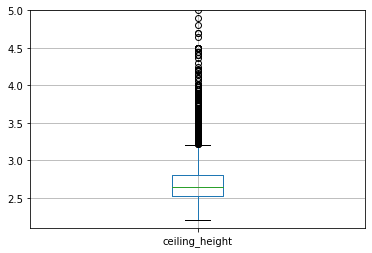

count   21796.00
mean       34.46
std        22.03
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

<AxesSubplot:>

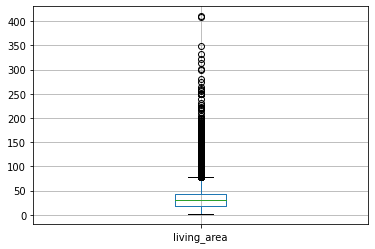

count   21421.00
mean       10.57
std         5.91
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

<AxesSubplot:>

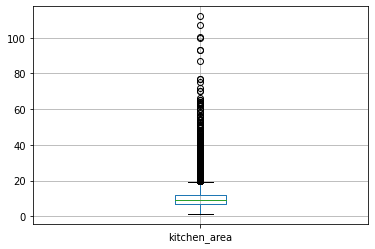

In [7]:
print(df[~df['ceiling_height'].isna()]['ceiling_height'].describe()) #      на всякий случай проверила, не учитывает ли 
#                                                                   график и расчеты пропущенные значения как 0 (Не учитывает)
plt.ylim(2.1, 5)
df.boxplot( column= 'ceiling_height')
plt.show()
display(df[~df['living_area'].isna()]['living_area'].describe())
#plt.ylim(2, 3)
display(df.boxplot( column= 'living_area'))
plt.show()
#plt.ylim(2, 3)
display(df[~df['kitchen_area'].isna()]['kitchen_area'].describe())
display(df.boxplot( column= 'kitchen_area'))
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
В качестве альтернативы, тут можно графики вывести при помощи цикла. 
</div 

**Выводы**:
В столбце "living_area" минимальная площадь составляет 2м2, что довольно подозрительно. Санитарная норма жилой площади на человека — минимальный метраж на одного человека, составляет 6 квадратных метров. Надо будет рассмотреть этот аспект ближе попозже и не забыть об этом.

Кухня в среднем также составляет 9м2. Однако, существуют коммунальные квартиры, в которых общий метраж делится на проживающих. Будем считать, что здесь определить сложную границу сложнее, и трогать эти значения не будем. Только проверим математику (общая площадь - жилая) и заполним пропущенный значения.

**Работа со столбцом "ceiling_height"**

2.2.3. Заполняем пропущенные значения ceiling_height, отчистив данные от выбросов и получая более точную медиану.

Так как минимальная высота между напольным покрытием и потолком в России должна составлять минимум 2,5 м, а допустимая высота коридоров и прочих нежилых помещений составляет 2,1 м, сделаем срез допустимых значений высоты потолка от 2,1м до 5м (максимальная высота потолка, введенного пользователями составляет 100м).

In [8]:
df[df['ceiling_height']>5]['ceiling_height'].sort_values(ascending=False)

22869   100.00
22336    32.00
3148     32.00
21377    27.50
22938    27.00
10773    27.00
21824    27.00
4876     27.00
20478    27.00
5246     27.00
5807     27.00
17857    27.00
5669     26.00
18545    25.00
14382    25.00
11285    25.00
355      25.00
9379     25.00
4643     25.00
6246     25.00
5076     24.00
20507    22.60
17496    20.00
15061    14.00
22309    10.30
5863      8.30
15743     8.00
17442     8.00
3474      8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
Name: ceiling_height, dtype: float64

Вводим новую переменную для измененной таблицы, чтобы всегда иметь возможность смотреть на оригинал данных и сравнивать.

Изменяем значения высоты потолков на более верные там, где это возможно.

Можно предположить, что высота 25м на самом деле должна быть 2,5м. Исправим это.
Остальные необычные значения просто удаляем из обработываемого датафрейма.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верные предположения делаешь. Давай так и попробуем 
</div 

In [9]:
df_prepr = df

df_prepr.loc[(df_prepr['ceiling_height']>=22.6)&(df_prepr['ceiling_height']<=32), 'ceiling_height'] /= 10

df_prepr = df_prepr.loc[((df_prepr['ceiling_height']>=2.1)&(df_prepr['ceiling_height']<=5))|(df_prepr['ceiling_height'].isna())]

display(df_prepr.loc[(df_prepr['ceiling_height']<2.1)&(df_prepr['ceiling_height']>5)]) #проверка на выходящие за рамки значения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Заполняем пропуски медианой.

In [10]:
pd.options.mode.chained_assignment = None # убираю предупреждение, чтобы не напрягало
df_prepr['ceiling_height'] = df_prepr['ceiling_height'].fillna(df_prepr['ceiling_height'].median())
df_prepr.info() #проверка на пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23670 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23670 non-null  int64  
 1   last_price            23670 non-null  float64
 2   total_area            23670 non-null  float64
 3   first_day_exposition  23670 non-null  object 
 4   rooms                 23670 non-null  int64  
 5   ceiling_height        23670 non-null  float64
 6   floors_total          23584 non-null  float64
 7   living_area           21771 non-null  float64
 8   floor                 23670 non-null  int64  
 9   is_apartment          2772 non-null   object 
 10  studio                23670 non-null  bool   
 11  open_plan             23670 non-null  bool   
 12  kitchen_area          21399 non-null  float64
 13  balcony               12166 non-null  float64
 14  locality_name         23621 non-null  object 
 15  airports_nearest   

2.2.4. Заполняем пропущенные значения living_area, kitchen_area, отчистив данные от выбросов и получая более точную медиану

Напомним, что в самом начале данные в столбце жилой площади показались нам странными, ведь некоторые составляли менее 6м2. Рассмотрим поближе.

In [11]:
df_prepr[['total_area', 'living_area', 'kitchen_area', 'rooms']].loc[df_prepr['living_area']<=7].sort_values(by='living_area', ascending=False)

,total_area,living_area,kitchen_area,rooms
19251,33.00,6.50,18.00,1
16431,31.00,6.00,17.00,1
21943,77.60,5.40,9.80,4
17582,22.00,5.00,NaN,0
3242,41.00,3.00,11.00,1
23574,139.00,3.00,16.00,3
13915,52.00,2.00,9.00,2
21758,23.00,2.00,NaN,0


В строке с индексом 21 943 находится 4хкомнатная квартира с жилой площадью в 5м2 и кухней 9,8м2 при этом общая площадь составляет все 76м2. Довольно странно. Вариантов может быть несколько:

1. Пользователь ошибся или опечатался и забыл поставить 0 в конце обозначения жилой площади, а, может, указал в десятках;

2. Перепутал местами значения жилой площади и кухни. Это звучит более правдоподобно, но на практике метраж кухонь тоже слишком мал, чтобы подойти. В той же строчке 21 943 площади 54м2+9,8м2 не даст 77,6м2 общей площади.

Очень странные данные. Решить попроще не представляется возможность, но удалять данные не хочется. Кажется, что это опечатки. Там, где это возможно, поставим дополнительный ноль за пользователя. Там, где невозможно, оставим как есть и откусим этот кусочек от исследуемых данных.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Чем мне нравится твой проект, так это пристальным и подробным изучением данных. Это очень хорошее качество для аналитика. 
</div 

In [12]:
def min_liv_a (row):
    if (row['living_area'] <= 7 and
        row['living_area']*10 <= row['total_area']):
        row['living_area'] *= 10
        return row
    else:
        return row
        
df_prepr = df_prepr.apply(min_liv_a, axis=1)
df_prepr = df_prepr.loc[df_prepr['living_area']>=7]
len(df_prepr[['total_area', 'living_area', 'kitchen_area', 'rooms']].loc[df_prepr['living_area']<=7].sort_values(by='living_area', ascending=False))

0

Очевидно, жилая площадь зависит от общей площади. Изначально хотелось категоризировать по взаимосвязи с количеством комнат, но некоторые комнаты крайне маленькие, а какие-то безумно большие. Данные получались слишком грязными и где-то могла не биться математика, поэтому было решено переделать в зависимости от общей площади. Категоризируем данные по общей площади, посчитаем медианы и заполним пропущенные значения.

count   21768.00
mean       60.07
std        34.63
min        12.00
25%        40.00
50%        52.00
75%        69.60
max       900.00
Name: total_area, dtype: float64


<AxesSubplot:>

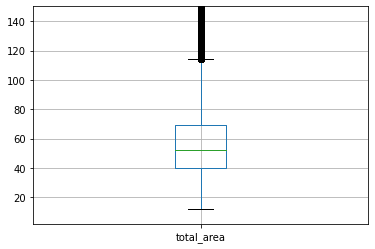

In [13]:
print(df_prepr['total_area'].describe())
plt.ylim(2, 150)
df_prepr.boxplot( column= 'total_area')

In [14]:
df[['total_area','living_area', 'kitchen_area', 'rooms']].loc[df['total_area'] == 900]

,total_area,living_area,kitchen_area,rooms
19540,900.00,409.70,112.00,12


Проверила самый странный выброс, но он выглядит просто очень богато, целых 12 комнат.

In [15]:
def categorize_area(area):
    try:
        if 0 <= area <= 15:
            return 'F'
        elif area <= 40:
            return 'E'
        elif area <= 52:
            return 'D'
        elif area <= 69:
            return 'C'
        elif area <= 118:
            return 'B'
        elif area <= 900:
            return 'A'
    except:
        pass
    
df_prepr['categorize_area'] = df_prepr['total_area'].apply(categorize_area)

group_df = df_prepr.groupby(['categorize_area'])

df_prepr['living_area']= group_df['living_area'].apply(lambda x: x.fillna(x.median()))

df_prepr.info() #проверка на пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21768 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21768 non-null  int64  
 1   last_price            21768 non-null  float64
 2   total_area            21768 non-null  float64
 3   first_day_exposition  21768 non-null  object 
 4   rooms                 21768 non-null  int64  
 5   ceiling_height        21768 non-null  float64
 6   floors_total          21715 non-null  float64
 7   living_area           21768 non-null  float64
 8   floor                 21768 non-null  int64  
 9   is_apartment          2652 non-null   object 
 10  studio                21768 non-null  bool   
 11  open_plan             21768 non-null  bool   
 12  kitchen_area          20958 non-null  float64
 13  balcony               11668 non-null  float64
 14  locality_name         21724 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно простой и работоспособный метод категоризации. 
</div 

Подсчитаем математику площадей кухонь.

In [16]:
def calc (row):
        if row['total_area'] == row['living_area']+row['kitchen_area']:
            return row
        elif row['total_area'] != row['living_area']+row['kitchen_area']:
            row['kitchen_area'] = row['total_area']-row['living_area']
            return row
        else:
            row['kitchen_area'] ='другой'
            return row

df_prepr = df_prepr.apply(calc, axis=1)
df_prepr.info() #проверка на пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21768 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21768 non-null  int64  
 1   last_price            21768 non-null  float64
 2   total_area            21768 non-null  float64
 3   first_day_exposition  21768 non-null  object 
 4   rooms                 21768 non-null  int64  
 5   ceiling_height        21768 non-null  float64
 6   floors_total          21715 non-null  float64
 7   living_area           21768 non-null  float64
 8   floor                 21768 non-null  int64  
 9   is_apartment          2652 non-null   object 
 10  studio                21768 non-null  bool   
 11  open_plan             21768 non-null  bool   
 12  kitchen_area          21768 non-null  float64
 13  balcony               11668 non-null  float64
 14  locality_name         21724 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Автоматизация наше все 
</div 

In [17]:
dg = df_prepr.loc[df_prepr['kitchen_area']<0]
len(dg[['total_area','living_area', 'kitchen_area', 'rooms']]) #проверка математики и отрицательных значений

0

2.2.5. Заполняем пропуски в balcony, parks_around3000, ponds_around3000 на 0, а в is_apartment ставим False. 

In [18]:
df_prepr['balcony'] = df_prepr['balcony'].fillna(0)
df_prepr['parks_around3000'] = df_prepr['parks_around3000'].fillna(0)
df_prepr['ponds_around3000'] = df_prepr['ponds_around3000'].fillna(0)
df_prepr['is_apartment'] = df_prepr['is_apartment'].fillna(False)
df_prepr.info() #проверка на пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21768 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21768 non-null  int64  
 1   last_price            21768 non-null  float64
 2   total_area            21768 non-null  float64
 3   first_day_exposition  21768 non-null  object 
 4   rooms                 21768 non-null  int64  
 5   ceiling_height        21768 non-null  float64
 6   floors_total          21715 non-null  float64
 7   living_area           21768 non-null  float64
 8   floor                 21768 non-null  int64  
 9   is_apartment          21768 non-null  bool   
 10  studio                21768 non-null  bool   
 11  open_plan             21768 non-null  bool   
 12  kitchen_area          21768 non-null  float64
 13  balcony               21768 non-null  float64
 14  locality_name         21724 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут я тоже поддержу такую замену пропусков. 
</div 

2.2.6. Удаляем лишние возможно мошенические объявления с пропуском в "locality_name".

In [19]:
df_prepr = df_prepr.dropna(subset=['locality_name'])
df_prepr.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21724 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21724 non-null  int64  
 1   last_price            21724 non-null  float64
 2   total_area            21724 non-null  float64
 3   first_day_exposition  21724 non-null  object 
 4   rooms                 21724 non-null  int64  
 5   ceiling_height        21724 non-null  float64
 6   floors_total          21672 non-null  float64
 7   living_area           21724 non-null  float64
 8   floor                 21724 non-null  int64  
 9   is_apartment          21724 non-null  bool   
 10  studio                21724 non-null  bool   
 11  open_plan             21724 non-null  bool   
 12  kitchen_area          21724 non-null  float64
 13  balcony               21724 non-null  float64
 14  locality_name         21724 non-null  object 
 15  airports_nearest   

2.2.7. Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты.

In [20]:
def replace_implicit_duplicates_in_locality_name(df, to_replace: list, value: str):
    to_replace = reversed(sorted(to_replace, key=len))
    to_replace = "|".join(to_replace)
    df['locality_name'] = df['locality_name'].replace(to_replace=to_replace, value=value, regex=True)
    return df

poselok = ['^городской пос[её]лок', '^коттеджный пос[её]лок', '^пос[её]лок', '^пос[её]лок при железнодорожной станции', '^пос[её]лок городского типа', 'пос[её]лок станции']
sad_tov = ['^садоводческое некоммерческое товарищество', '^садовое товарищество', '^садоводческое некоммерческое товарищество']
selo    = ['^село', 'Село$']

df_prepr = replace_implicit_duplicates_in_locality_name(df_prepr, poselok, "поселок")
df_prepr = replace_implicit_duplicates_in_locality_name(df_prepr, sad_tov, "садовое товарищество")
df_prepr = replace_implicit_duplicates_in_locality_name(df_prepr, selo, "село")

df_prepr.loc[df_prepr['locality_name'] == "Красное село", 'locality_name'] = "село Красное" # частный случай

#df_prepr.loc[~df_prepr['locality_name'].str.startswith('поселок')&
#             ~df_prepr['locality_name'].str.startswith('садовое товарищество')&
#             ~df_prepr['locality_name'].str.startswith('деревня')&
#             ~df_prepr['locality_name'].str.startswith('село')
#        , 'locality_name'].unique() # проверка необработанных названий

df_prepr['locality_name'].sort_values().unique() # проверка

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное',
       'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск',
       'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'деревня Агалатово',
       'деревня Аро', 'деревня Батово', 'деревня Бегуницы',
       'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Выскатка', 'деревня Гарболово', 'деревня Глинка'

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И вновь хороший метод проработки данных. В целом, тут можно было даже чуть проще сделать, и заменть занчения на одно слово посёлок через цикл for. 
</div 

2.2.8. Изменяем тип данных в столбце "first_day_exposition" на время, чтобы могли использовать этот столбик для расчетов. Столбец "is_apartment" сам переконвертировался в булевы значения в процессе обработки. В самом начале он был object.

In [21]:
df_prepr['first_day_exposition'] = pd.to_datetime(df_prepr['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
df_prepr.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21724 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21724 non-null  int64         
 1   last_price            21724 non-null  float64       
 2   total_area            21724 non-null  float64       
 3   first_day_exposition  21724 non-null  datetime64[ns]
 4   rooms                 21724 non-null  int64         
 5   ceiling_height        21724 non-null  float64       
 6   floors_total          21672 non-null  float64       
 7   living_area           21724 non-null  float64       
 8   floor                 21724 non-null  int64         
 9   is_apartment          21724 non-null  bool          
 10  studio                21724 non-null  bool          
 11  open_plan             21724 non-null  bool          
 12  kitchen_area          21724 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верно переводишь столбец в формат даты. 
</div 

Теперь данные дозаполнены и почищены от выбросов или подозрительных значений. Можно идти дальше. В ходе процесса пришлось удалить 1 975 строки (а очень хотелось больше, очень уж непонятны некоторые объявления и задать уточняющие вопросы по выгрузке некому), это 8,3% от начального массива данных. Кажется допустимым. Такие измения не должны сильно повлиять на результат, если было урезано лишнее.

Довольно поздно (на 4м шаге) было замечено странное название колонки cityCenters_nearest, но лучше исправить его позже, чем никогда. До 4го шага этот столбец не использовался, поэтому нельзя сказать, что это критично. Чтобы быть порядочными, все же 
исправим на змеиный регистр.

In [22]:
df_prepr = df_prepr.rename (columns= {'cityCenters_nearest': 'city_centers_nearest'})

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в таблицу новые столбцы со следующими параметрами:

3.1. цена одного квадратного метра;

3.2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

3.3. месяц публикации объявления;

3.4. год публикации объявления;

3.5. тип этажа квартиры (значения — «первый», «последний», «другой»);

3.6. расстояние до центра города в километрах.


In [23]:
df_add = df_prepr

#                                     3.1.
df_add['price'] = df_add['last_price']/(df_add['kitchen_area']+df_add['living_area'])
df_add['price'] = df_add['price'].round()

#                                     3.2.
df_add['weekday'] = df_add['first_day_exposition'].dt.dayofweek

#                                     3.3.
df_add['month'] = df_add['first_day_exposition'].dt.month

#                                     3.4.
df_add['year'] = df_add['first_day_exposition'].dt.year

#                                     3.5.
def categor_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый' # первый этаж и в Африке первый, поэтому его проверяем первым, даже если нет значения "всего этажей"
        elif row['floors_total'] == np.nan: # заполнять эти пропуски медианой было не очень умно, поэтому их малая часть осталась.
            return np.nan                   # не будем никого обманывать и оставим там нан
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет категории'
    
df_add['categor_floor'] = df_add.apply(categor_floor, axis=1)


#                                     3.6.

def distance_center(row):
    try:
        if row['city_centers_nearest'] == np.nan: # заполнять эти пропуски медианой было не очень умно, поэтому их малая часть осталась.
            return np.nan                        # не будем никого обманывать и оставим там нан
        else:
            return row['city_centers_nearest']/1000
    except:
        return np.nan


df_add['distance_center_in_km'] = df_add.apply(distance_center, axis=1)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Лихо ты проработала все в одной ячейке кода. На будущее, советую так много разного кода выводить в нескольких ячейках. Это для того, чтобы если ты поймала ошибку, то тебе проще было ее найти. 
</div 

In [24]:
len(df_add.loc[(df_add['price']>275000)|(df_add['price']<5000)])

182

In [25]:
df_add = df_add.loc[(df_add['price']<=275000)&(df_add['price']>5000)]

Позже будет выяснено, что выбросы цены довольно сильно влияют на корреляцию, показывая менее корректные цифры, поэтому все-таки отрежем подозрительные строки, например 2 млн рублей или 100 рублей за м2.

In [26]:
df_add.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,categorize_area,price,weekday,month,year,categor_floor,distance_center_in_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,2.00,755.00,NaN,B,120370.00,3,3,2019,другой,16.03
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,0.00,NaN,81.00,D,82921.00,1,12,2018,первый,18.60
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,2.00,574.00,558.00,C,92786.00,3,8,2015,другой,13.93
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,1.00,48.00,121.00,B,100000.00,1,6,2018,другой,8.10
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,0.00,NaN,55.00,E,95066.00,0,9,2018,другой,NaN
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,...,0.00,NaN,155.00,E,99196.00,3,11,2017,другой,19.14
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,...,0.00,NaN,189.00,E,87455.00,2,5,2018,другой,NaN
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,0.00,NaN,289.00,C,88525.00,6,2,2017,другой,15.01
10,5,5050000.00,39.60,2017-11-16,1,2.67,12.00,20.30,3,False,...,2.00,553.00,137.00,E,127525.00,3,11,2017,другой,13.88
11,9,3300000.00,44.00,2018-08-27,2,2.65,5.00,31.00,4,False,...,0.00,NaN,7.00,D,75000.00,0,8,2018,другой,51.68


### Проведите исследовательский анализ данных

Изучаем следующие показатели:

4.1.1. общая площадь; (+)

4.1.2. жилая площадь; (+)

4.1.3. площадь кухни; (+)

4.1.4. цена объекта; (+)

4.1.5. количество комнат; (+)

4.1.6. высота потолков; (+)

4.1.7. этаж квартиры; (+)

4.1.8. тип этажа квартиры («первый», «последний», «другой»); (+)

4.1.9. общее количество этажей в доме; (+)

4.1.10. расстояние до центра города в метрах; (+)

4.1.11. расстояние до ближайшего аэропорта; (+)

4.1.12. расстояние до ближайшего парка; (+)

4.1.13. день и месяц публикации объявления. (+)

count   21542.00
mean       59.21
std        32.22
min        12.00
25%        40.00
50%        51.70
75%        68.97
max       631.20
Name: total_area, dtype: float64

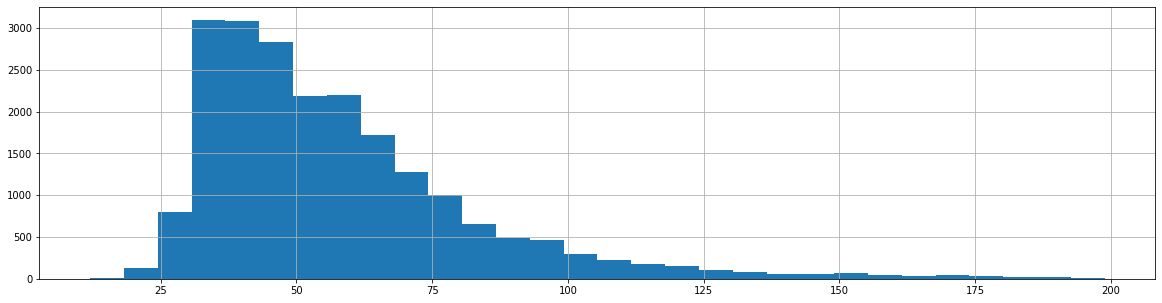

In [27]:
df_add['total_area'].loc[df_add['total_area']<200].hist(figsize=(20, 5), bins=30) #чтобы видеть побольше, приближаем срезом. 
                                                       # Можно было бы удалить данные, но не очень хочется о них нечаянно забыть
df_add['total_area'].describe()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А еще, не забывай давать графикам названия. Так сразу будет понятно, что ты на них пытаешься показать. 
</div 

Больше всего квартир попадают в диапазон примерно 31-46м2. Какие-то однушки-двушки. Кажется, что в жизни их действительно больше других. Похоже на правду.

count   21542.00
mean       33.99
std        20.82
min         8.00
25%        18.60
50%        30.00
75%        42.00
max       409.00
Name: living_area, dtype: float64

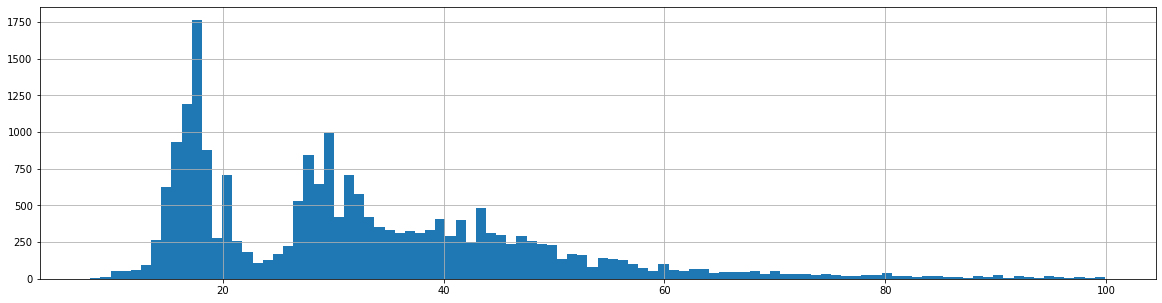

In [28]:
df_add['living_area'].loc[df_add['living_area']<100].hist(figsize=(20, 5), bins=100)
df_add['living_area'].describe()

Гистограмма намного более "прыгучая" нежели в первом случае. Есть несколько пиков. Больше всего случаев приходится на жилые площади примерно в 18м2. Кроме того есть пик ниже примерно между 25 и 30м2. Возможно, на метраж примерно в 22-24м2, приходящийся на место провала, просто крайне мало планировок квартир, а потому и строят их реже. Больших квартир все также довольно мало.

count   21542.00
mean       25.22
std        14.54
min         0.00
25%        17.00
50%        22.00
75%        29.00
max       339.30
Name: kitchen_area, dtype: float64

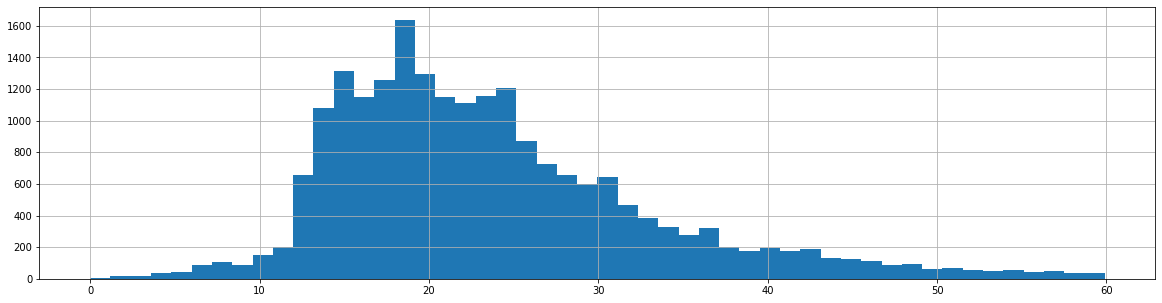

In [29]:
df_add['kitchen_area'].loc[df_add['kitchen_area']<60].hist(figsize=(20, 5), bins=50)
df_add['kitchen_area'].describe()

Пик приходится на кухни метражом примерно 18м2 до 25м2. Это разница с пиком жилой площади в 18м2, но там он не один, да и количество объявлений в пиках больше.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, кухни у нас небольшие.
</div 

count    21542.00
mean     96750.54
std      34245.82
min       9615.00
25%      77000.00
50%      94854.50
75%     113333.00
max     275000.00
Name: price, dtype: float64

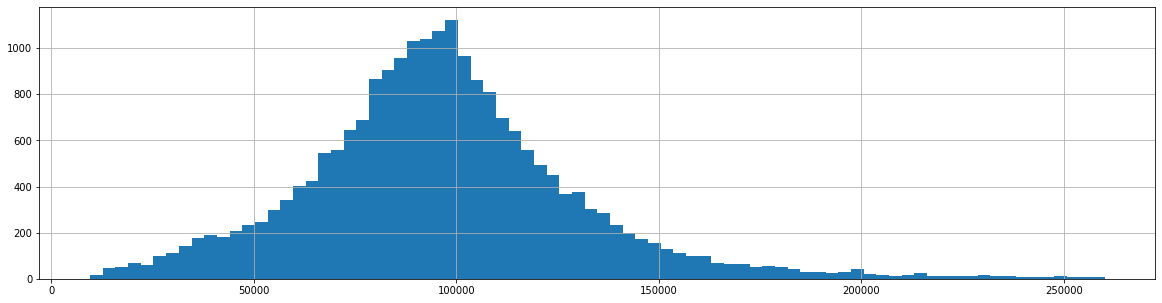

In [30]:
df_add['price'].loc[df_add['price']<=260000].hist(figsize=(20, 5), bins=80)
df_add['price'].describe()

Цена за м2 дала довольно красивую гистограмму с пиком в 98 тыс. рублей за м2. Похоже на нормальное распределение, если не смотреть на хвост в конце. Можно было бы обрезать некоторые данные, например ту же неадекватную цену почти в 2 млн за м2, но рука не поднимается. Для меня многие данные в этом датафрейме выглядят странными (например, цена в рублях (112 рублей), а не тысячах) и если их удалять, то потеряется слишком большой объем.

count   21542.00
mean        2.69
std         0.21
min         2.20
25%         2.60
50%         2.65
75%         2.70
max         4.70
Name: ceiling_height, dtype: float64

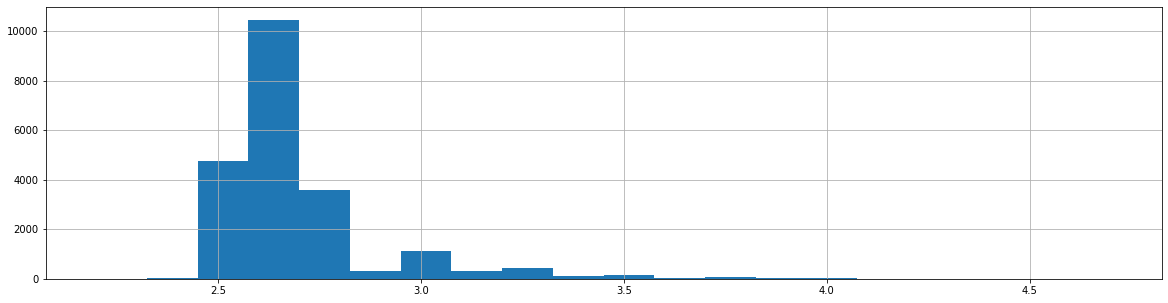

In [31]:
df_add['ceiling_height'].hist(figsize=(20, 5), bins=20)
df_add['ceiling_height'].describe()

Стандартные потолки в Санкт-Петербурге и ЛО приходятся примерно на 2,6м. Немного и немало, нормально. Самые низкие - 2,2м, самые высокие- 4,7. Были и больше, но мы убрали их из датасета за подозрительность.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Слишком высокие потолки могут свидетельствовать о дореволюцоннной застройке. 
</div 

count   21542.00
mean        2.06
std         1.07
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

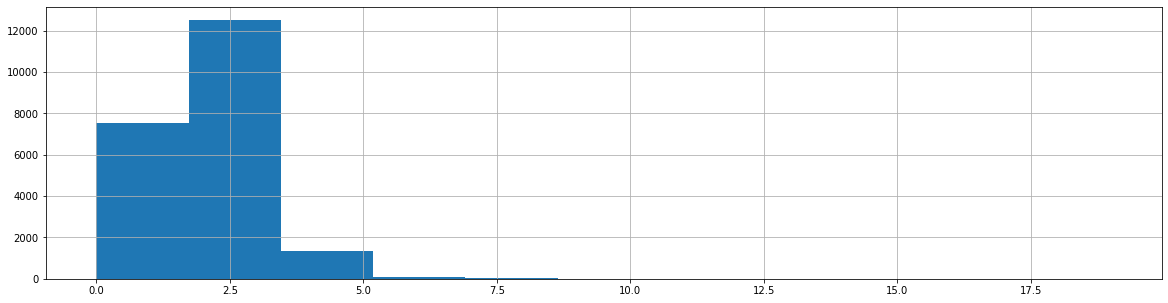

In [32]:
df_add['rooms'].hist(figsize=(20, 5), bins=11)
df_add['rooms'].describe()

Пик приходится на квартиры с 1-3 комнатами. Есть и 5, и даже 12 комнат, но большая часть населения продает квартиры с 2-3 комнатами.

count   21542.00
mean        5.90
std         4.88
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

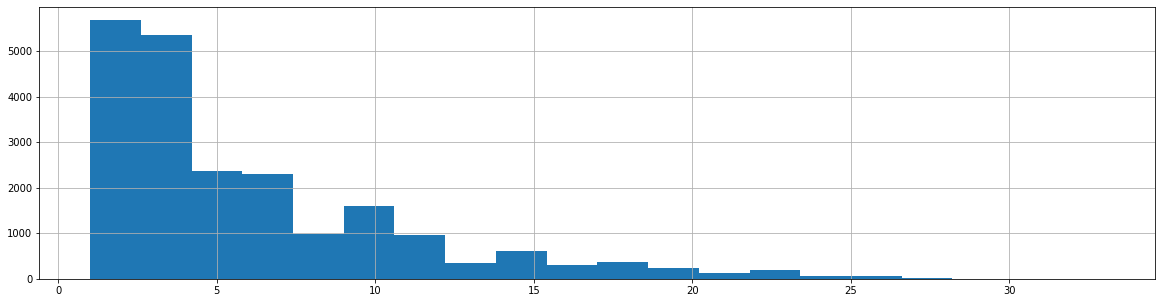

In [33]:
df_add['floor'].hist(figsize=(20, 5), bins=20)
df_add['floor'].describe()

Больше всего хотят избавиться от своих квартир владельцы помещений первых этажей (от 1 до 4). Это неудивительно. Во-первых, существуют частные дома, они априори стоят на первом и могут прописать у себя первый этаж, а во-вторых, абсолютно в каждом доме есть первый этаж в отличие от 25. 

count      21542
unique         3
top       другой
freq       15860
Name: categor_floor, dtype: object

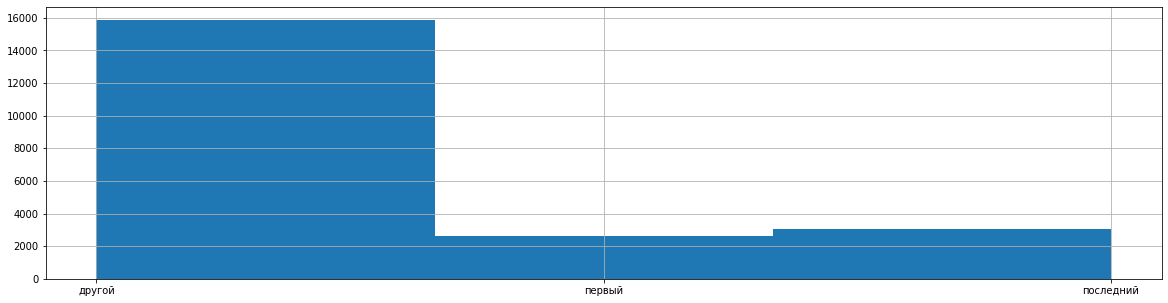

In [34]:
df_add['categor_floor'].hist(figsize=(20, 5), bins=3)
df_add['categor_floor'].describe()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются наименьшим спросом. 
</div 

Последних этажей продавалось в исследуемый период больше, чем первых. Но иных этажей, конечно, было в разы больше, чем первых и последних вместе взятых, что тоже абсолютно неудивительно.

count   21490.00
mean       10.67
std         6.58
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

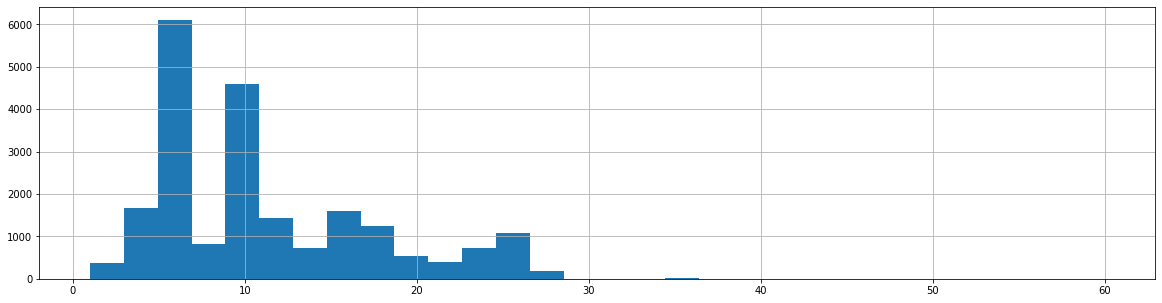

In [35]:
df_add['floors_total'].hist(figsize=(20, 5), bins=30)
df_add['floors_total'].describe()

Много домов на 7 и 9-11 этажей. Между ними наблюдается провал на 8 этажах. Если подумать, то сложно вспомнить дом на 8 этажей, хоть такие все равно существуют. Есть и небоскреб на 60, но домов выше 28 этайжей крайне мало.

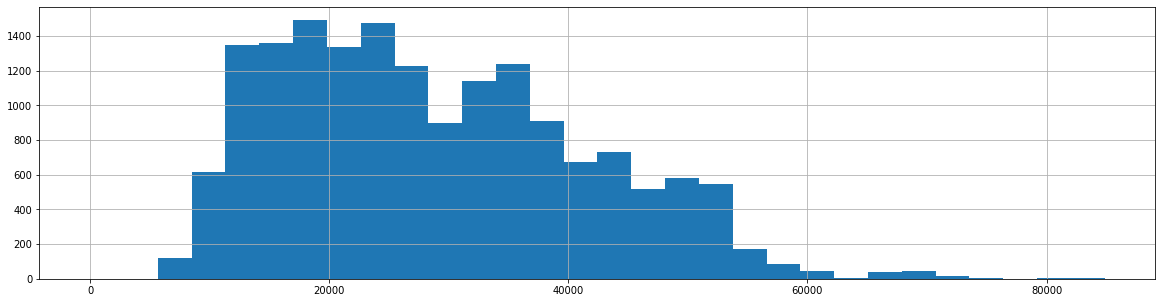

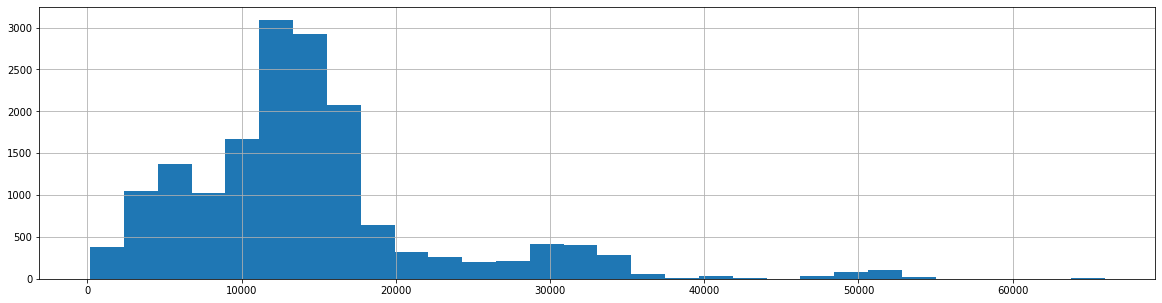

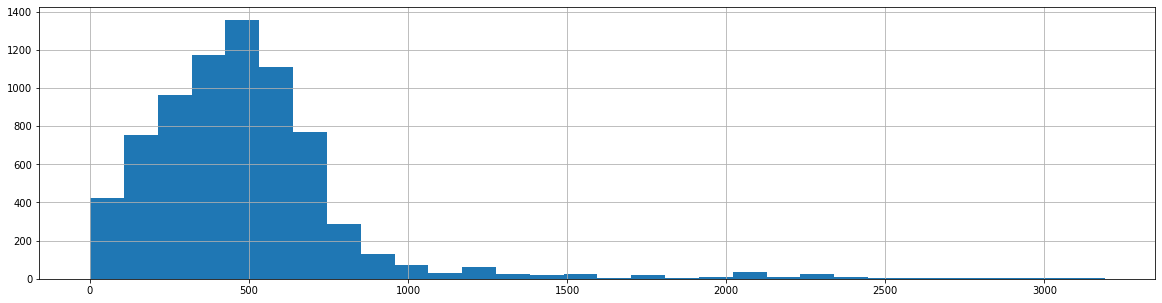

In [36]:
df_add['airports_nearest'].hist(figsize=(20, 5), bins=30)
plt.show()
df_add['city_centers_nearest'].hist(figsize=(20, 5), bins=30)
plt.show()
df_add['parks_nearest'].hist(figsize=(20, 5), bins=30)
plt.show()

Большая часть продаваемой недвижимости находится примерно в 12-24 км от аэропорта.
Большая часть продаваемой недвижимости находится примерно в 9-18 км от центра города.
Пик продаваемой недвижимости находится примерно в 0,5 км от парка. Очень удобно и приятно.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По выводам согласен. 
</div 

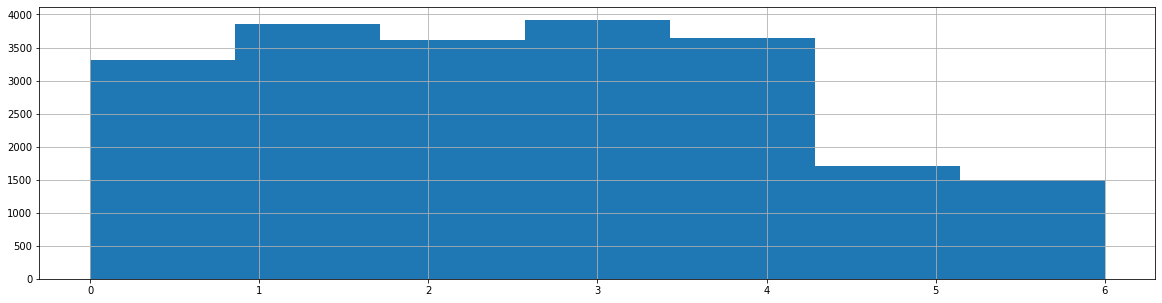

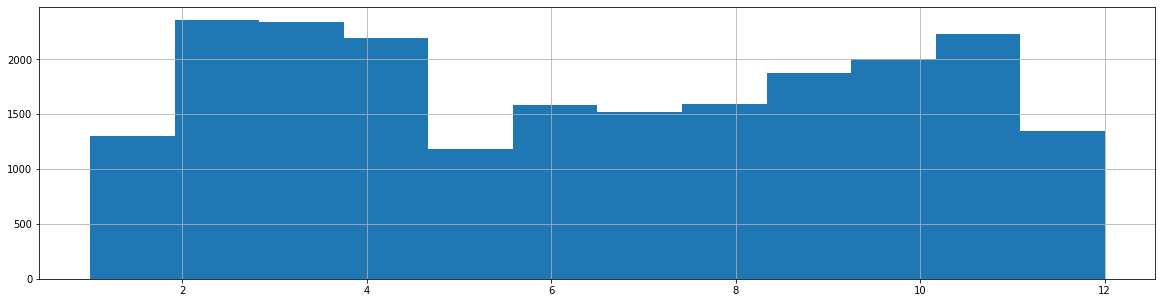

In [37]:
df_add['weekday'].hist(figsize=(20, 5), bins=7) 
plt.show()
df_add['month'].hist(figsize=(20, 5), bins=12)
plt.show()

В будни пользователи вполне охотно и примерно одинаково выставляют объявления на продажу, однако в четверг и вторник они чуть более активны. В выходные же наоборот, примерно половина потенциальных создателей объявлений отдыхает и не проявляет активности так, как в будни.

Чаще всего помещения выставляют на продажу в самом конце зимы-начале весны. Почему-то в мае гораздо меньше желающих выставить помещение для продажи. Май насыщен праздниками, может, люди радуются первому теплу и шашлыкам. Летом желающих становится больше, но еще не так много, как в августе-ноябре. Ноябрь можно назвать вторым пиком второго полугодия. Потом активность тоже падает, возможно, тоже из-за праздников.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все так и есть. Праздники и выходные дают просадку. 
</div 

**Изучим некоторые параметры наших данных**

count   18609.00
mean      183.85
std       220.23
min         1.00
25%        44.00
50%       100.00
75%       237.00
max      1580.00
Name: days_exposition, dtype: float64

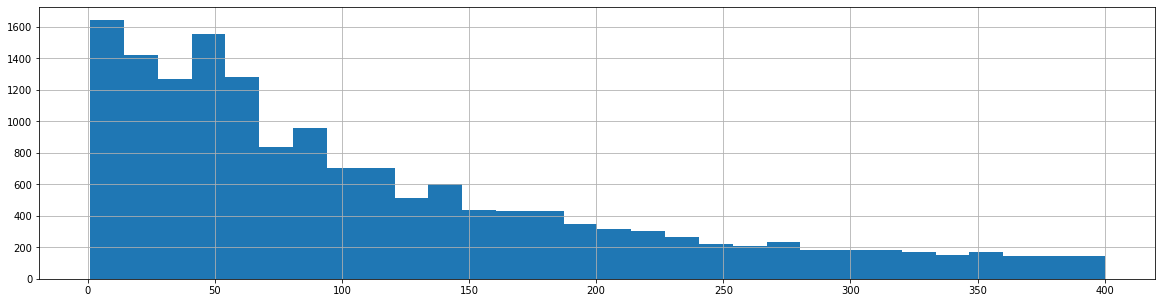

In [38]:
df_add['days_exposition'].loc[df_add['days_exposition']<=400].hist(figsize=(20, 5), bins=30)
df_add['days_exposition'].describe()

Примерно четверть недвижимости уходит с рынка не больше чем за 44 дня. Пик количества продаж мелкает у нуля. Это подозрительно, поэтому смотрим дальше. Второй пик количества продаж приходится примерно на 48-51 сутки. Довольно быстро и более правдоподобно. Однако, есть и рекордсмены. Кто-то продавал недвижимость целых 1 580 дней. Возможно, это та самая квартира со стоимостью м2 почти 2 млн рублей.
Среднее составляет 180.76 суток, а медиана - 95.00. Это можно объяснить устойчивостью медианы к выбросам, которые так сильно влияют на среднее, ведь максимально долгая продажа составила 1 580 дней и подобный случай не единственный.

<AxesSubplot:>

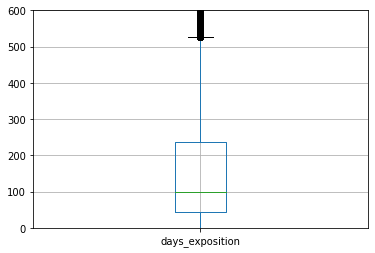

In [39]:
plt.ylim(0, 600)
df_add.boxplot( column = 'days_exposition')

Я бы сказала, что необычно долгий срок продажи превышает 220 суток, а совсем выходящий за рамки превышает 500. Быстрые продажи же-это те, которые успевают уложиться в срок до 45 суток.

(Для меня эти выводы кажутся странноватыми, но это может быть из-за отсуствия какого-либо опыта в области продажи/покупки недвижимости. Перед реальными выводами обязательно посоветовалась бы с теми, кто этим вопросом занимается, потому что кажется, что недвижимость не относится к собственности, которую приобретают так быстро. Это серьезная дорогая покупка, часто берется в ипотеку, а потому и выбирают недвижимость обычно небыстро. Где-то прекрасная квартира, но не лучшая инфрастуктура, а где-то отличная инфрастуктура и даже местро рядом, но сама квартира ужасной планировки или дом проблемный. Квартира или другая недвижимость кажется слишком важной покупкой, чтобы укладываться за 45 дней в четверти случаев. Кажется, что медиана должна проходить гораздо выше. Конечно, в объявлениях есть мошенники или странные подозрительные объявления-однодневки, но убирать их не хочется. К тому же следует учитывать, что пользователи могут снимать объявления чуть раньше, чем продавали квартиры. Конечно, разница в 1-2 дня ничего не решает, но вариантов может быть немало. Сначала следовало бы посоветоваться с более опытными коллегами, прежде чем совершать какие-то действия с этими данными. Дальше будем действовать из того, что ситуация нормальна)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень основательные выводы получились. 
</div 

**Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [71]:
df_add[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'categor_floor']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.00,0.83,0.74,0.78,0.54
total_area,0.83,1.00,0.94,0.87,0.78
living_area,0.74,0.94,1.00,0.65,0.86
kitchen_area,0.78,0.87,0.65,1.00,0.51
rooms,0.54,0.78,0.86,0.51,1.00


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А вот здесь не могу похвалить. Для месяца, года и дня недели нет смысла считать корреляцию, так как для этого параметра нет линейной связи.
</div 

<div class="alert alert-block alert-info">
    
### Правка

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Так намного лучше. 
</div 

Искать зависимость стоимости продаваемой недвижимости от дней недели так просто через корреляцию нельзя, ведь дни недели - категориальные данные. Обычной прямой зависимости здесь просто не может быть. Поступим также, как с км до центра города: сгруппируем и построим графики. Будем искать зависимость глазами на графиках.

In [95]:
df_d = df_add[['weekday', 'month', 'year', 'last_price']]

time = ['weekday', 'month', 'year']
df_time = []
for e in time:
    df_sorted = df_d[[e, 'last_price']].pivot_table(index= e, values = 'last_price', aggfunc='mean').sort_values(by=e, ascending = False)
    df_time.append(df_sorted)

<AxesSubplot:title={'center':'Зависимость стоимости недвижимости от дня недели'}, xlabel='weekday'>

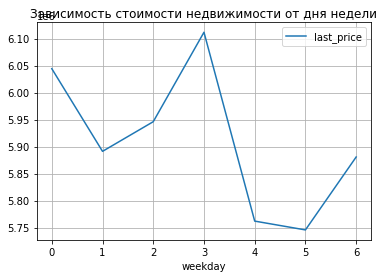

In [96]:
df_time[0].plot(grid=True, title= 'Зависимость стоимости недвижимости от дня недели')

<AxesSubplot:title={'center':'Зависимость стоимости недвижимости от месяца'}, xlabel='month'>

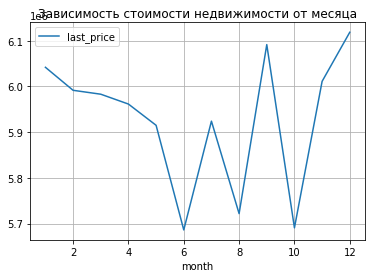

In [97]:
df_time[1].plot(grid=True, title= 'Зависимость стоимости недвижимости от месяца')

<AxesSubplot:title={'center':'Зависимость стоимости недвижимости от года'}, xlabel='year'>

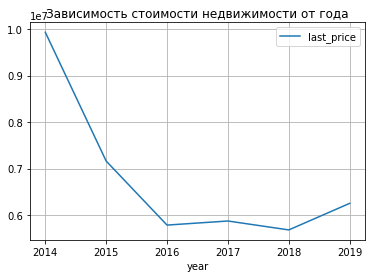

In [98]:
df_time[2].plot(grid=True, title= 'Зависимость стоимости недвижимости от года')

Вывод:
    
Если вы хотите купить недвижимость в Санкт-Петербурге и ЛО подешевле, то лучше делать это в пятницу или субботу. Благоприятными будут и воскресенье с вторником, хотя там и немного дороже. Самым дорогим днем оказывается четверг, поэтому если речь не о покупке, а о продаже, то лучше пытаться продать свое имущество в четверг или понедельник.
    
Как ни странно, но пик цен приходится на декабрь. Чуть меньше на январь и сентябрь. При этом стоит вспомнить, что в празничные зимние месяцы (январь, декабрь) и предложений значительно меньше. Скорее всего, спрос повышается, а предложений не хватает, поэтому цена растет. При этом популярные по количеству объявлений месяцы июнь, август и октябрь наоборот оказываются самыми "дешевыми". Звучит тоже логично: чем больше предложений, тем ниже цена. Все хотят продать свой товар.
    
2014 год был крайне насыщен не самыми удачными для покупки жилья событиями: санкции, повышение ЦБ ключевой ставки, падение курса рубля по отношению к доллару и евро. Все это привело к вкладам в недвижимость и пику цен. В 2015 цены резко упали и продолжили падать, хоть чуть менее быстро до 2016. На ближайшие 2 года цена более-менее стабилизировалась, но в 2019 снова медленно поползла вверх. Даже интересно посмотреть, что случилось с ценами в первом полугодии 2022 года.
    
Все это можно учитывать при расчете рыночной цены недвижимости.
    
(Если честно, я бы искала зависимость между ценой за м2 и этими показателями, так мне кажется корректнее, но задание посмотреть взаимосвязь с именно полной стоимостью).

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

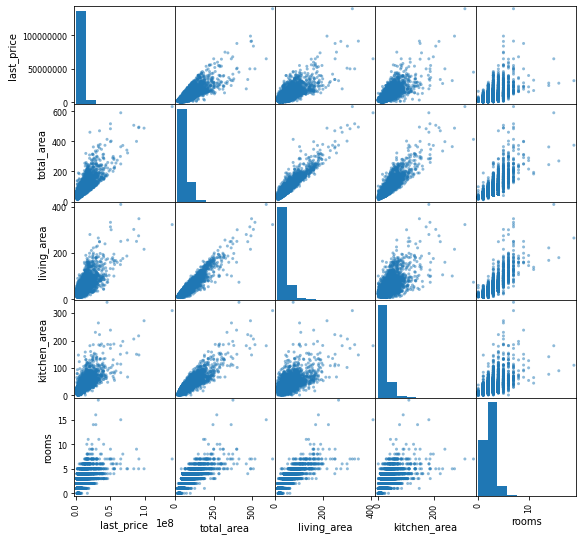

In [72]:
pd.plotting.scatter_matrix(df_add[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'categor_floor']], figsize=(9, 9)) 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

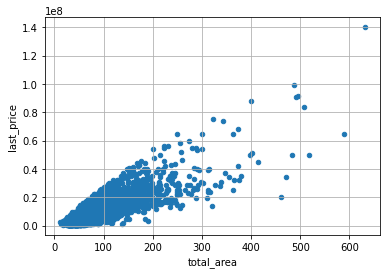

In [42]:
df_add.plot(x='total_area', y='last_price', kind='scatter', grid=True) 

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

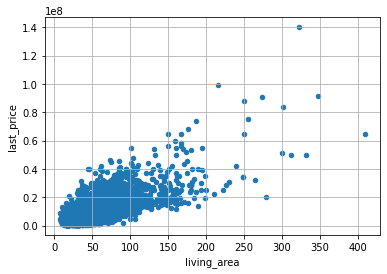

In [43]:
df_add.plot(x='living_area', y='last_price', kind='scatter', grid=True) 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

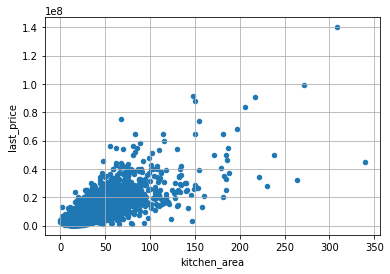

In [44]:
df_add.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

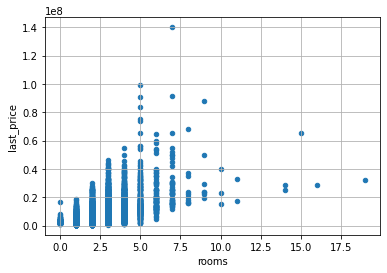

In [45]:
df_add.plot(x='rooms', y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

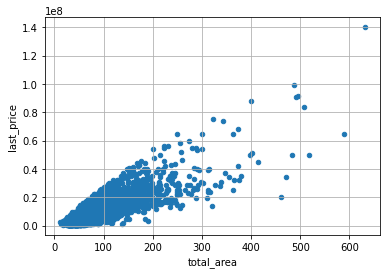

In [46]:
df_add.plot(x='total_area', y='last_price', kind='scatter', grid=True) 

Уже заметны довольно очевидные вещи: чем больше площадь квартиры, тем выше цена. Это видно и на графике, и в таблице коэффициентов корреляции Пирсона. Высокая прямолинейная зависимость между общей площадью и ценой с коэффицентом в 0,83. Значит, при увеличении площади квартиры увеличивается и цена. Логично. Аналогичная зависимость прослеживается и между ценой и жилой площадью/площадью кухни. Хоть она и чуть слабее общей, но вполне ожидаемо (ведь общая площадь прямо влиет на жилую и кухонную площадь) сильно влияет на значение цены с коэффициентами 0,74 и 0,78 соотвественно. Количество комнат умерено влияет на цену с коэффициентом 0,54. А вот дни недели, месеца, года демонстрируют либо крайне слабую обратную зависимость, либо и вовсе ее отсуствие. Здесь она скорее отсуствует. Ну или просто нелинейная.

Поближе построены только те графики, где можно увидеть заметную и высокую зависимость.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И снова графики хороший с отличными выводами. 
</div 

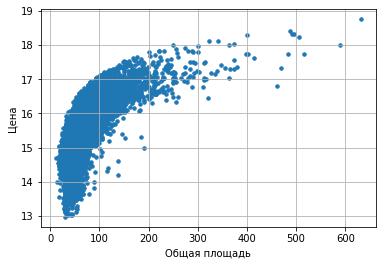

In [47]:
xs = df_add['total_area']
ys = df_add['last_price'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True, alpha=1)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

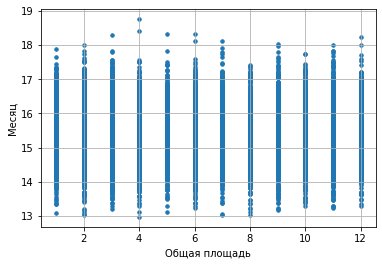

In [48]:
xs = df_add['month']
ys = df_add['last_price'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True, alpha=1)
plt.xlabel('Общая площадь')
plt.ylabel('Месяц')
plt.show()

Хотелось как-то визуализировать корреляцию. Результат получился не менее очевидным, нежели обычные графики. Очевидная сильная зависимость на графике и ничего интересного на графике с месяцами.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные будем искать по имени в столбце locality_name**

In [49]:
df_10 = df_add.pivot_table(index='locality_name', values = ['total_area', 'price'],
                               aggfunc={'total_area': 'count',
                                        'price': 'mean'}).sort_values(by='total_area', ascending = False).head(10)

df_10 = df_10[df_10['total_area']>=197]

len(df_10) #проверка, чтобы не оказалось 2х или 3х территорий с количеством объявлений 197.

df_10.sort_values(by='price', ascending=False)

,price,total_area
locality_name,,
Санкт-Петербург,110313.70,14383
Пушкин,103428.49,345
деревня Кудрово,92702.22,262
поселок Парголово,90442.55,301
поселок Мурино,86308.31,492
Петергоф,84480.94,197
поселок Шушары,78886.41,404
Колпино,75344.09,328
Гатчина,68627.34,292


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 составлен верно. 
</div 

Ожидаемо, самый дорогой м2 оказался в Питере. Да и количество объявлений там в разы больше, чем в других населенных пунктах. А купить квартиру подешевле можно во Всеволжске со средней ценой за м2 в 67,4 тыс. рублей.

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Посмотрим, как стоимость объектов зависит от расстояния до центра города.


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

А вот здесь надо было поступить чуть иначе. Зависимость тут надо считать не через корреляцию, а по графику. Для эттго построй сводную таблицу со средней ценой за целый км. Далее, ты ее визуализируешь и увидишь, как сильно меняется цена в зависимости от центра. 
</div 

In [50]:
df_spb = df_add.loc[df_add['locality_name'] == 'Санкт-Петербург']
df_spb = df_spb[['distance_center_in_km','price']]
df_spb = df_spb.loc[~df_spb['distance_center_in_km'].isna()]
print((df_spb['price']/df_spb['distance_center_in_km']).mean())
df_spb.corr()

14589.980463068609


,distance_center_in_km,price
distance_center_in_km,1.00,-0.35
price,-0.35,1.00


Средняя ценность 1км до центра города в Санкт-Петербурге составляет 14,5 тыс рублей. Зависимость между ценой м2 и расстоянием от центра города обратная умеренная. Выглядит логично: чем дальше недвижимость от центра города, тем она дешевле.

<div class="alert alert-block alert-info">
    
### Правка

Строим сводную таблицу со средней ценой за целый км до центра города.

In [56]:
df_spb['distance_center_in_km'] = round(df_spb['distance_center_in_km']) #в этом столбце есть nan, которые не переводятся
                                                           # в int(). Поэтому просто округляю. В данном случае это не критично.

In [65]:
df_spb.pivot_table (index='distance_center_in_km', values = 'price', aggfunc='mean').sort_values(by='distance_center_in_km', ascending = False).head(10)

,price
distance_center_in_km,
29.00,72953.50
28.00,81161.86
27.00,132115.50
26.00,89451.22
25.00,90883.41
24.00,85445.78
23.00,92213.41
22.00,89659.79
21.00,91650.45


<AxesSubplot:title={'center':'Зависимость стоимости м2 от расстония до центра города'}, xlabel='distance_center_in_km', ylabel='price'>

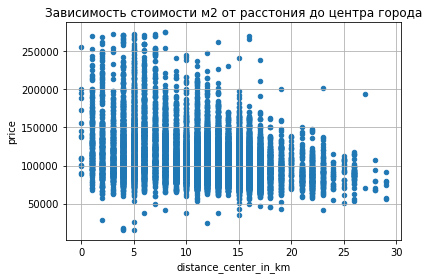

In [70]:
df_spb.sort_values(by='distance_center_in_km').plot(x='distance_center_in_km', y='price', kind='scatter', grid=True, title= 'Зависимость стоимости м2 от расстония до центра города')

<div class="alert alert-block alert-info">
    
### Вывод по правке

На этом графике действительно хорошо видно, как с отдалением от центра города падает и цена за м2. В промежутке от 25 до 30 км от центра есть только одно предлодение, стремящиеся к стоимость 200 тыс рублей за м2.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично и тут. 
</div 

### Общий вывод

Основными показателями, влиящими на стоимость недвижимости и которые следует учитывать при расчете цены:

1. Общая площадь (высокая прямая зависимость, коэффициент корреляции Пирсона - 0,83);

2. Площадь кухни (высокая прямая зависимость, коэффициент корреляции Пирсона - 0,78);

3. Жилая площадь (высокая прямая зависимость, коэффициент корреляции Пирсона - 0,74);

4. Количество комнат (заметная прямая зависимость, коэффициент корреляции Пирсона - 0,54);

5. Расстояние до центра города (обратная зависимость).

Как интересную особенность можно отметить, что пользовательская активность в части создания новых объявлений о продаже падает в субботу, воскресенье. Также менее активными других мясяцев выходят январь, май и декабрь.

Чаще всего недвижимость в Санкт-Петербурге и ЛО имеет следующие характеристики:

1. Высота потолков 2,2м;

2. Пики жилой площади появляются на значениях 18, 25, 30м2;

3. Большая часть цен недвижимости за м2 составляет 98 тысяч рублей;

4. Самые популярные предложения встречаются на этажах до 4 включительно, но последний этаж встречается чаще первого;

5. Самая популярная этажность зданий, где продается недвижимость - 7 и 9-11 этажей;

6. В среднем недвижимость в Санкт-Петербурге и ЛО находится в 12-24км до аэропорта, 9 и 18км от центра города и 0,5км от ближайшего парка;

7. Минимум в половине случаев объявление о продаже недвижимости "висит" на сайте не больше 100 дней.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод, как идеальное дополнение для твоего проекта. Тут ты описала все то, что обнаружила в ходе исследования. Отлично. 
</div 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Поздравляю тебя с выполнением твоего проекта по Исследовательскому анализу. Мне показалось, что работа выполненна прекрасно и ты здорово постаралась. Понравилось, что ты хорошо владеешь отличными навыками Предобработки данных и построения графиков. А еще особенно ценно, что ты везде пишешь аргументацию своим действиям. Так, если проект попадет в руки незнакомому человеку, он сможет разобраться. Это тебе очень пригодится в будущем.

В проекте осталось небольшое замечение:
    
* Требуется уброать подсчет корреляции для дня, месяца и года продажи.
* Пересомтреть вопрос нахожденяи зависимости от центра.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
    
    
Жду проект после доработки. Уверен, ты справишься.
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод